In [2]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml


In [3]:
print(os.listdir("input"))
                

['.DS_Store', 'input']


In [4]:
df = pd.read_csv('input/input/BreadBasket_DMS.csv')

In [41]:
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [7]:
df.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

In [32]:
print("List of items sold at the bakery:")
print("Total items:", len(df.Item.unique()))
for i in df.Item.unique():
    print(i)

List of items sold at the bakery:
Total items: 95
Bread
Scandinavian
Hot chocolate
Jam
Cookies
Muffin
Coffee
Pastry
Medialuna
Tea
NONE
Tartine
Basket
Mineral water
Farm House
Fudge
Juice
Ella's Kitchen Pouches
Victorian Sponge
Frittata
Hearty & Seasonal
Soup
Pick and Mix Bowls
Smoothies
Cake
Mighty Protein
Chicken sand
Coke
My-5 Fruit Shoot
Focaccia
Sandwich
Alfajores
Eggs
Brownie
Dulce de Leche
Honey
The BART
Granola
Fairy Doors
Empanadas
Keeping It Local
Art Tray
Bowl Nic Pitt
Bread Pudding
Adjustment
Truffles
Chimichurri Oil
Bacon
Spread
Kids biscuit
Siblings
Caramel bites
Jammie Dodgers
Tiffin
Olum & polenta
Polenta
The Nomad
Hack the stack
Bakewell
Lemon and coconut
Toast
Scone
Crepes
Vegan mincepie
Bare Popcorn
Muesli
Crisps
Pintxos
Gingerbread syrup
Panatone
Brioche and salami
Afternoon with the baker
Salad
Chicken Stew
Spanish Brunch
Raspberry shortbread sandwich
Extra Salami or Feta
Duck egg
Baguette
Valentine's card
Tshirt
Vegan Feast
Postcard
Nomad bag
Chocolates
Coffee gran

In [8]:
df.describe(include='all')

,Date,Time,Transaction,Item
count,21293,21293,21293.000000,21293
unique,159,8240,NaN,95
top,2017-02-04,12:07:39,NaN,Coffee
freq,302,16,NaN,5471
mean,NaN,NaN,4951.990889,NaN
std,NaN,NaN,2787.758400,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2548.000000,NaN
50%,NaN,NaN,5067.000000,NaN
75%,NaN,NaN,7329.000000,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

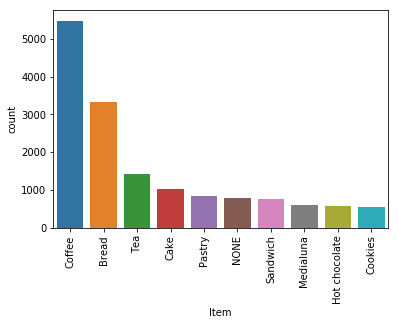

In [14]:
sns.countplot(x='Item',data=df,order=df['Item'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [56]:
data=df.groupby(['Transaction','Item']).size().reset_index(name='count')

data.head()

,Transaction,Item,count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [36]:
data.head(15)

,Transaction,Item,count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1
8,5,Pastry,1
9,6,Medialuna,1


In [37]:
basket = (data.groupby(['Transaction', 'Item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

In [40]:
basket.tail(20)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
9664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [24]:
basket_sets=basket.applymap(encode_units)

In [25]:
basket_sets.head(10)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [27]:
rules = association_rules(frequent_itemsets, metric="lift")

In [28]:
rules.sort_values('confidence', ascending = False, inplace = True)

In [30]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
42,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
28,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
34,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
2,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
26,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
32,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
37,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
17,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
38,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310
